<a href="https://colab.research.google.com/github/PajrulPalah/project_internship_indekstat/blob/main/project_SLM/Analisis_Perolehan_Kursi_Pileg_DPRD_Kab_Kota__Dengan_Metode_SLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANALISA PEROLEHAN KURSI PILEG DPRD KAB/KOTA MENGGUNAKAN METODE SAINTE LAGUE MURNI**

In [11]:
# Mengistall Library untuk proses analisa data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3


In [5]:
#langkah pertama adalah kita mengupload dataset data_magang_dprd_kab ke google drive yang yang terpaut pada google collab
#Setelah itu kita tautkan dari gdrive ke google collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
#Langkah selanjutnya adalah membaca data dan memberikan nama variabel pada dataset tersebut
data_politik = pd.read_csv('/content/drive/MyDrive/DATASET/data_magang_dprd_kab.csv')

In [13]:
len(data_politik)

1245348

In [9]:
# Melihat nama kolom
print(data_politik.columns)


Index(['nm_dapil', 'nm_desa', 'nm_kec', 'nm_kota', 'nm_prov', 'mask_partai',
       'perolehan'],
      dtype='object')


In [15]:
print(data_politik.head())

       nm_dapil          nm_desa          nm_kec     nm_kota nm_prov  \
0  ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
1  ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
2  ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
3  ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
4  ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   

  mask_partai  perolehan  
0        SmR1          3  
1        UWR2         77  
2        SnJv        406  
3        U0dM         87  
4        Smh1        194  


In [14]:
# Melakukan summary terhadap kolom 'perolehan'
summary_perolehan = data_politik['perolehan'].describe()

# Menampilkan summary
print(summary_perolehan)
df_null = pd.DataFrame(data_politik)



count    1.245348e+06
mean     1.054680e+02
std      2.756217e+02
min      0.000000e+00
25%      2.000000e+00
50%      1.700000e+01
75%      8.800000e+01
max      1.958600e+04
Name: perolehan, dtype: float64


In [21]:
# Mengecek informasi tentang nilai null di setiap kolom
print("Total nilai null di setiap kolom:")
print(df_null.isnull().sum())

Total nilai null di setiap kolom:
nm_dapil       0
nm_desa        0
nm_kec         0
nm_kota        0
nm_prov        0
mask_partai    0
perolehan      0
dtype: int64


In [43]:
# Menggunakan filter untuk menampilkan baris dengan nilai 'perolehan' kurang dari 1
nilai_dibawah_1 = data_politik[data_politik['perolehan'] < 1]

# Menampilkan baris-baris yang nilai 'perolehan'-nya kurang dari 1
print(nilai_dibawah_1)


             nm_dapil           nm_desa          nm_kec     nm_kota nm_prov  \
35       ACEH BARAT 1      DRIEN RAMPAK  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
45       ACEH BARAT 1             GAMPA  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
64       ACEH BARAT 1  KAMPUNG BELAKANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
76       ACEH BARAT 1  KAMPUNG BELAKANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
87       ACEH BARAT 1     KAMPUNG DARAT  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
...               ...               ...             ...         ...     ...   
1245339      YALIMO 3          YUTANGGO         ABENAHO      YALIMO   PAPUA   
1245340      YALIMO 3          YUTANGGO         ABENAHO      YALIMO   PAPUA   
1245341      YALIMO 3          YUTANGGO         ABENAHO      YALIMO   PAPUA   
1245344      YALIMO 3          YUTANGGO         ABENAHO      YALIMO   PAPUA   
1245347      YALIMO 3          YUTANGGO         ABENAHO      YALIMO   PAPUA   

        mask_partai  perolehan  
35             SmR

In [44]:
# Membuat DataFrame baru tanpa baris yang memiliki nilai 'perolehan' di bawah 1
data_politik_1 = data_politik[data_politik['perolehan'] >= 1].copy()

# Menampilkan DataFrame baru yang tidak termasuk nilai 'perolehan' di bawah 1
print(data_politik_1)


             nm_dapil          nm_desa          nm_kec     nm_kota nm_prov  \
0        ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
1        ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
2        ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
3        ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
4        ACEH BARAT 1  BLANG BERANDANG  JOHAN PAHLAWAN  ACEH BARAT    ACEH   
...               ...              ...             ...         ...     ...   
1245337      YALIMO 3         YUTANGGO         ABENAHO      YALIMO   PAPUA   
1245342      YALIMO 3         YUTANGGO         ABENAHO      YALIMO   PAPUA   
1245343      YALIMO 3         YUTANGGO         ABENAHO      YALIMO   PAPUA   
1245345      YALIMO 3         YUTANGGO         ABENAHO      YALIMO   PAPUA   
1245346      YALIMO 3         YUTANGGO         ABENAHO      YALIMO   PAPUA   

        mask_partai  perolehan  
0              SmR1          3

In [45]:
# Menghitung jumlah seluruh kolom 'perolehan'
total_perolehan = data_politik_1['perolehan'].sum()

# Menampilkan jumlah seluruh kolom 'perolehan'
print("Jumlah seluruh kolom 'perolehan':", total_perolehan)


Jumlah seluruh kolom 'perolehan': 131344323


In [46]:
# Menampilkan nilai unik dari kolom 'mask_partai'
unique_mask_partai = data_politik_1['mask_partai'].unique()

# Mencetak nilai unik dari kolom 'mask_partai'
print("Nilai unik dari kolom 'mask_partai':")
print(unique_mask_partai)


Nilai unik dari kolom 'mask_partai':
['SmR1' 'UWR2' 'SnJv' 'U0dM' 'Smh1' 'U05F' 'U05T' 'U0VF' 'U1FE' 'U0di'
 'U2R1' 'U0Q=' 'R2hw' 'S2Rx' 'U0RR' 'U1ZM' 'U1NT' 'U2h1' 'U05W' 'RWh1']


In [48]:
# Filter data berdasarkan nilai unik dari kolom 'mask_partai'
nilai_unik_mask_partai = ['SmR1', 'UWR2', 'SnJv', 'U0dM', 'Smh1', 'U05F', 'U05T', 'U0VF', 'U1FE', 'U0di', 'U2R1', 'U0Q=', 'R2hw', 'S2Rx', 'U0RR', 'U1ZM', 'U1NT', 'U2h1', 'U05W', 'RWh1']
data_filter = data_politik_1[data_politik_1['mask_partai'].isin(nilai_unik_mask_partai)]

# Menghitung total perolehan berdasarkan nilai 'mask_partai'
total_perolehan_mask_partai = data_filter.groupby('mask_partai')['perolehan'].sum()

# Menampilkan total perolehan berdasarkan 'mask_partai'
print("Total perolehan berdasarkan 'mask_partai':")
print(total_perolehan_mask_partai)


Total perolehan berdasarkan 'mask_partai':
mask_partai
R2hw    10642333
RWh1     2430302
S2Rx     4709291
SmR1      595767
Smh1    14910197
SnJv    16361616
U05F    13646604
U05T      929074
U05W    10220170
U0Q=      492982
U0RR     8979069
U0VF     1889202
U0dM    22384549
U0di       89566
U1FE      209512
U1NT     7643129
U1ZM     1438786
U2R1       40122
U2h1     3585345
UWR2    10146707
Name: perolehan, dtype: int64


In [49]:
# Mengurutkan total perolehan dari yang terbesar
total_perolehan_mask_partai_sorted = total_perolehan_mask_partai.sort_values(ascending=False)

# Menampilkan hasil urutan perolehan dari yang terbesar
print("Total perolehan berdasarkan 'mask_partai' (urutan terbesar ke terkecil):")
print(total_perolehan_mask_partai_sorted)


Total perolehan berdasarkan 'mask_partai' (urutan terbesar ke terkecil):
mask_partai
U0dM    22384549
SnJv    16361616
Smh1    14910197
U05F    13646604
R2hw    10642333
U05W    10220170
UWR2    10146707
U0RR     8979069
U1NT     7643129
S2Rx     4709291
U2h1     3585345
RWh1     2430302
U0VF     1889202
U1ZM     1438786
U05T      929074
SmR1      595767
U0Q=      492982
U1FE      209512
U0di       89566
U2R1       40122
Name: perolehan, dtype: int64


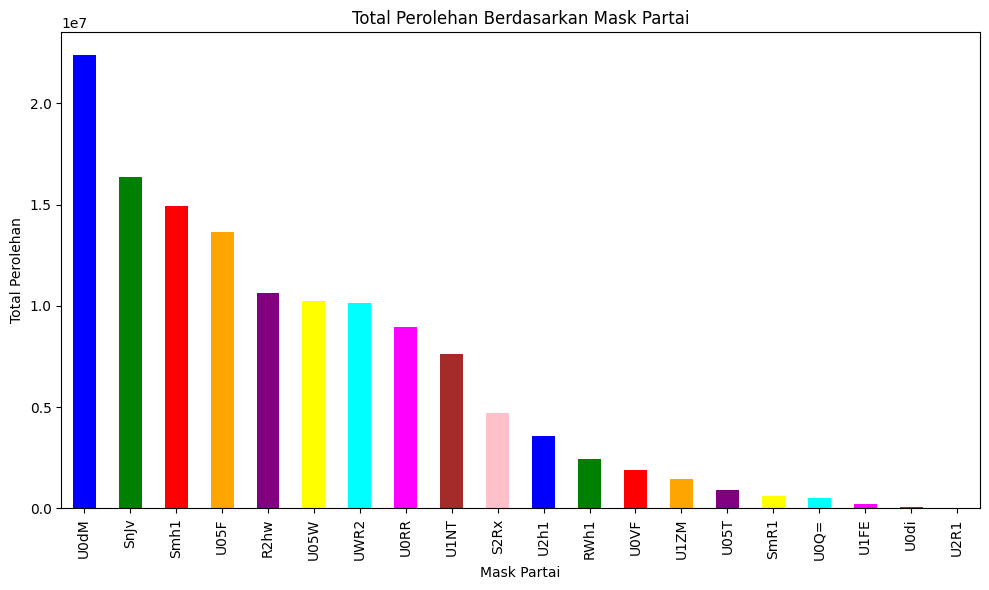

In [50]:
import matplotlib.pyplot as plt

# Membuat grafik batang
plt.figure(figsize=(10, 6))  # Mengatur ukuran grafik

# Menggambar grafik batang dengan warna yang berbeda untuk setiap 'mask_partai'
total_perolehan_mask_partai_sorted.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'pink'])

# Memberikan judul dan label sumbu pada grafik
plt.title('Total Perolehan Berdasarkan Mask Partai')
plt.xlabel('Mask Partai')
plt.ylabel('Total Perolehan')

# Menampilkan grafik
plt.tight_layout()
plt.show()


In [54]:
# Data awal dari kolom mask_partai
mask_partai_values = ['SmR1', 'UWR2', 'SnJv', 'U0dM', 'Smh1', 'U05F', 'U05T', 'U0VF', 'U1FE', 'U0di',
 'U2R1', 'U0Q=', 'R2hw', 'S2Rx', 'U0RR', 'U1ZM', 'U1NT', 'U2h1', 'U05W', 'RWh1']

# Membuat DataFrame baru untuk hasil perhitungan
result_df = pd.DataFrame(columns=['mask_partai', 'total_perolehan'])

# Menghitung total perolehan berdasarkan nilai mask_partai
for value in mask_partai_values:
    total_perolehan = data_politik_1[data_politik_1['mask_partai'] == value]['perolehan'].sum()
    result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)

# Mengurutkan DataFrame berdasarkan kolom 'total_perolehan' dari yang terbesar
result_df = result_df.sort_values(by='total_perolehan', ascending=False)

# Mengatur ulang indeks baris dari 0 hingga 19
result_df = result_df.reset_index(drop=True)

# Menampilkan DataFrame yang sudah diurutkan
print(result_df)
# Menyimpan DataFrame ke dalam file CSV
result_df.to_csv('suara_partai.csv', index=False)

<ipython-input-54-32eaec6dae45>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)
<ipython-input-54-32eaec6dae45>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)
<ipython-input-54-32eaec6dae45>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)
<ipython-input-54-32eaec6dae45>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   mask_partai total_perolehan
0         U0dM        22384549
1         SnJv        16361616
2         Smh1        14910197
3         U05F        13646604
4         R2hw        10642333
5         U05W        10220170
6         UWR2        10146707
7         U0RR         8979069
8         U1NT         7643129
9         S2Rx         4709291
10        U2h1         3585345
11        RWh1         2430302
12        U0VF         1889202
13        U1ZM         1438786
14        U05T          929074
15        SmR1          595767
16        U0Q=          492982
17        U1FE          209512
18        U0di           89566
19        U2R1           40122


<ipython-input-54-32eaec6dae45>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)
<ipython-input-54-32eaec6dae45>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)


## **Metode SLM**

In [52]:
# Data awal dari kolom mask_partai
mask_partai_values = ['SmR1', 'UWR2', 'SnJv', 'U0dM', 'Smh1', 'U05F', 'U05T', 'U0VF', 'U1FE', 'U0di',
 'U2R1', 'U0Q=', 'R2hw', 'S2Rx', 'U0RR', 'U1ZM', 'U1NT', 'U2h1', 'U05W', 'RWh1']

# Membuat DataFrame baru untuk hasil perhitungan
result_df = pd.DataFrame(columns=['mask_partai', 'total_perolehan'])

# Menghitung total perolehan berdasarkan nilai mask_partai
for value in mask_partai_values:
    total_perolehan = data_politik_1[data_politik_1['mask_partai'] == value]['perolehan'].sum()
    result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)

# Membuat kolom baru dengan deret bilangan ganjil dari 1 hingga 40123
result_df = result_df.reindex(columns=result_df.columns.tolist() + list(range(1, 40124, 2)))

# Melakukan perhitungan kursi Sainte-Laguë
for index, row in result_df.iterrows():
    perolehan = row['total_perolehan']
    for i in range(1, 40124, 2):
        if perolehan % i != 0:
            result_df.at[index, i] = perolehan / i
            perolehan %= i

# Menampilkan DataFrame hasil perhitungan
print(result_df)


<ipython-input-52-730903b3079f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)
<ipython-input-52-730903b3079f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)
<ipython-input-52-730903b3079f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'mask_partai': value, 'total_perolehan': total_perolehan}, ignore_index=True)
<ipython-input-52-730903b3079f>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat ins

   mask_partai total_perolehan   1             3          5              7  \
0         SmR1          595767 NaN           NaN   119153.4       0.285714   
1         UWR2        10146707 NaN  3.382236e+06        0.4       0.285714   
2         SnJv        16361616 NaN           NaN  3272323.2       0.142857   
3         U0dM        22384549 NaN  7.461516e+06        0.2       0.142857   
4         Smh1        14910197 NaN  4.970066e+06        0.4       0.285714   
5         U05F        13646604 NaN           NaN  2729320.8       0.571429   
6         U05T          929074 NaN  3.096913e+05        0.2       0.142857   
7         U0VF         1889202 NaN           NaN   377840.4       0.285714   
8         U1FE          209512 NaN  6.983733e+04        0.2       0.142857   
9         U0di           89566 NaN  2.985533e+04        0.2       0.142857   
10        U2R1           40122 NaN           NaN     8024.4       0.285714   
11        U0Q=          492982 NaN  1.643273e+05        0.2     

In [39]:
# Mengurutkan DataFrame berdasarkan kolom 'total_perolehan' dari yang terbesar
result_df = result_df.sort_values(by='total_perolehan', ascending=False)

# Mengatur ulang indeks baris dari 0 hingga 19
result_df = result_df.reset_index(drop=True)
# Menampilkan DataFrame yang sudah diurutkan
print(result_df)

   mask_partai total_perolehan   1             3          5              7  \
0         U0dM        22384549 NaN  7.461516e+06        0.2       0.142857   
1         SnJv        16361616 NaN           NaN  3272323.2       0.142857   
2         Smh1        14910197 NaN  4.970066e+06        0.4       0.285714   
3         U05F        13646604 NaN           NaN  2729320.8       0.571429   
4         R2hw        10642333 NaN  3.547444e+06        0.2       0.142857   
5         U05W        10220170 NaN  3.406723e+06        0.2       0.142857   
6         UWR2        10146707 NaN  3.382236e+06        0.4       0.285714   
7         U0RR         8979069 NaN           NaN  1795813.8       0.571429   
8         U1NT         7643129 NaN  2.547710e+06        0.4       0.285714   
9         S2Rx         4709291 NaN  1.569764e+06        0.4       0.285714   
10        U2h1         3585345 NaN           NaN        NaN  512192.142857   
11        RWh1         2430302 NaN  8.101007e+05        0.4     

# Dari Hasil Di Atas Tidak valid, Kemungkinan Kesalahan Dalam Perhitungan dan Tipe Data.

# **Menggunakan Dataset Baru**

In [2]:
#Langkah selanjutnya adalah membaca data dan memberikan nama variabel pada dataset tersebut
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Data awal dari kolom mask_partai dan total_perolehan
suara_partai = pd.read_csv('/content/drive/MyDrive/DATASET/suara_partai.csv')

In [8]:
# Cek dataset
print(suara_partai)

   mask_partai  total_perolehan
0         U0dM         22384549
1         SnJv         16361616
2         Smh1         14910197
3         U05F         13646604
4         R2hw         10642333
5         U05W         10220170
6         UWR2         10146707
7         U0RR          8979069
8         U1NT          7643129
9         S2Rx          4709291
10        U2h1          3585345
11        RWh1          2430302
12        U0VF          1889202
13        U1ZM          1438786
14        U05T           929074
15        SmR1           595767
16        U0Q=           492982
17        U1FE           209512
18        U0di            89566
19        U2R1            40122


## Dari hasil Analisa terdapat 4 Partai lokal, Di sini saya mengasumsikan suara partai 4 terbawah akan dihapus karena akan mempengaruhi metode SLM secara keseluruhan.
4 Partai tersebut diantaranya urutan ke- :

16        U0Q=           492982

17        U1FE           209512

18        U0di            89566

19        U2R1            40122

In [9]:
# Menghapus baris dari indeks 16 hingga 19
suara_partai.drop(suara_partai.index[16:20], inplace=True)

In [10]:
# Cek dataset
print(suara_partai)

   mask_partai  total_perolehan
0         U0dM         22384549
1         SnJv         16361616
2         Smh1         14910197
3         U05F         13646604
4         R2hw         10642333
5         U05W         10220170
6         UWR2         10146707
7         U0RR          8979069
8         U1NT          7643129
9         S2Rx          4709291
10        U2h1          3585345
11        RWh1          2430302
12        U0VF          1889202
13        U1ZM          1438786
14        U05T           929074
15        SmR1           595767


## **Metode Perhitungan Kursi Sainte-Laguë**

In [17]:

# Inisialisasi DataFrame untuk hasil perhitungan kursi Sainte-Laguë
hasil_kursi = suara_partai.copy()

# Melakukan perhitungan kursi Sainte-Laguë
for index, row in hasil_kursi.iterrows():
    perolehan = row['total_perolehan']
    kursi = 0
    deret_ganjil = 1
    while kursi < 17153:  # Ubah angka ini sesuai dengan jumlah kursi yang diinginkan
        kursi += 1
        hasil_bagi = perolehan / deret_ganjil
        hasil_kursi.at[index, f'kursi_{kursi}'] = hasil_bagi
        deret_ganjil += 2

# Menyimpan hasil perhitungan kursi Sainte-Laguë ke dalam file CSV
hasil_kursi.to_csv('hasil_kursi_sainte_lague.csv', index=False)


Streaming output truncated to the last 5000 lines.
<ipython-input-17-acc02b9165a5>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hasil_kursi.at[index, f'kursi_{kursi}'] = hasil_bagi
<ipython-input-17-acc02b9165a5>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  hasil_kursi.at[index, f'kursi_{kursi}'] = hasil_bagi
<ipython-input-17-acc02b9165a5>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

In [18]:
print(hasil_kursi)


   mask_partai  total_perolehan     kursi_1       kursi_2    kursi_3  \
0         U0dM         22384549  22384549.0  7.461516e+06  4476909.8   
1         SnJv         16361616  16361616.0  5.453872e+06  3272323.2   
2         Smh1         14910197  14910197.0  4.970066e+06  2982039.4   
3         U05F         13646604  13646604.0  4.548868e+06  2729320.8   
4         R2hw         10642333  10642333.0  3.547444e+06  2128466.6   
5         U05W         10220170  10220170.0  3.406723e+06  2044034.0   
6         UWR2         10146707  10146707.0  3.382236e+06  2029341.4   
7         U0RR          8979069   8979069.0  2.993023e+06  1795813.8   
8         U1NT          7643129   7643129.0  2.547710e+06  1528625.8   
9         S2Rx          4709291   4709291.0  1.569764e+06   941858.2   
10        U2h1          3585345   3585345.0  1.195115e+06   717069.0   
11        RWh1          2430302   2430302.0  8.101007e+05   486060.4   
12        U0VF          1889202   1889202.0  6.297340e+05   3778

In [19]:
# Membuat DataFrame baru tanpa kolom 'perolehan'
slm_tanpa_perolehan = hasil_kursi.drop(columns='total_perolehan')
print(slm_tanpa_perolehan)


   mask_partai     kursi_1       kursi_2    kursi_3       kursi_4  \
0         U0dM  22384549.0  7.461516e+06  4476909.8  3.197793e+06   
1         SnJv  16361616.0  5.453872e+06  3272323.2  2.337374e+06   
2         Smh1  14910197.0  4.970066e+06  2982039.4  2.130028e+06   
3         U05F  13646604.0  4.548868e+06  2729320.8  1.949515e+06   
4         R2hw  10642333.0  3.547444e+06  2128466.6  1.520333e+06   
5         U05W  10220170.0  3.406723e+06  2044034.0  1.460024e+06   
6         UWR2  10146707.0  3.382236e+06  2029341.4  1.449530e+06   
7         U0RR   8979069.0  2.993023e+06  1795813.8  1.282724e+06   
8         U1NT   7643129.0  2.547710e+06  1528625.8  1.091876e+06   
9         S2Rx   4709291.0  1.569764e+06   941858.2  6.727559e+05   
10        U2h1   3585345.0  1.195115e+06   717069.0  5.121921e+05   
11        RWh1   2430302.0  8.101007e+05   486060.4  3.471860e+05   
12        U0VF   1889202.0  6.297340e+05   377840.4  2.698860e+05   
13        U1ZM   1438786.0  4.7959

In [22]:
# Membuat Data frame baru
df_partai = pd.DataFrame(slm_tanpa_perolehan)

# Menggabungkan semua kolom menjadi satu seri
combined_series = df_partai.set_index('mask_partai').stack()

# Mencari 2 nilai terbesar dari seri yang telah digabungkan
top_17341_values = combined_series.nlargest(17153)

print(top_17341_values)
top_17341_values.to_csv('top_17341_partai.csv', index=False)

mask_partai            
U0dM         kursi_1       2.238455e+07
SnJv         kursi_1       1.636162e+07
Smh1         kursi_1       1.491020e+07
U05F         kursi_1       1.364660e+07
R2hw         kursi_1       1.064233e+07
                               ...     
             kursi_1399    3.804910e+03
Smh1         kursi_1960    3.804592e+03
UWR2         kursi_1334    3.804540e+03
U05F         kursi_1794    3.804462e+03
U1NT         kursi_1005    3.804444e+03
Length: 17153, dtype: float64


In [23]:
# Memisahkan indeks MultiIndex menjadi tiga kolom terpisah
top_17341_values.reset_index().to_csv('top_17341_partai.csv', index=False)